In [1]:
import pandas as pd
import numpy as np

使用filter,map,assign,eval,apply,groupby,rename,loc,query,agg等进行链式方法的录入

In [2]:
df_fk=pd.read_excel(r"D:\1日常学习文件夹\Python-pandas数据集\caiwufenxi\在建工程.xlsx",sheet_name="付款")

In [3]:
df_fk.head(3)

,合同编号,客商编码,合同额,实际结算额,会计凭证号,付款时间,付款额,发票额,备注说明
0,SB_001,A001,7500000,NaN,建-0010,2020-12-12,2250000,NaN,NaN
1,SB_002,A002,1500000,NaN,建-0011,2020-12-12,450000,NaN,NaN
2,SB_003,A001,300000,NaN,建-0012,2020-12-12,90000,NaN,NaN


# 列的筛选和增加的方法

## 使用query筛选列

query之间的列名操作都使用原始的列名。和eval可以对比使用。

同eval的不同点在于，eval除了用于查询外还可以增加新列或者对原有的列进行计算

可以使用@变量的形式添加变量来进行使用

In [4]:
a01=df_fk.付款额.mean()
a01

274057.8947368421

In [5]:
df1=(df_fk.filter(items=["合同编号","客商编码","付款额"])
     .query('付款额==450000 | 付款额>500000')
     .copy()
)
df1

,合同编号,客商编码,付款额
0,SB_001,A001,2250000
1,SB_002,A002,450000
11,TJ_001,A008,900000
12,TJ_002,A009,450000
37,SB_001,A001,4500000
38,SB_002,A002,900000
49,TJ_001,A008,1200000
50,TJ_002,A009,600000
51,TJ_003,A010,624000


In [6]:
#在链式反应中难免需要引入变量，可以使用如下的玩法
df2=(df_fk[["合同编号","客商编码","付款额"]]
     .query('付款额>(400000+@a01)')
    )
# 增加行的操作如果用下面的方式就无法进行链式操作
a=df2.付款额.sum()
df2.loc[len(df2)]=["sd","fd",a]
df2

,合同编号,客商编码,付款额
0,SB_001,A001,2250000
11,TJ_001,A008,900000
37,SB_001,A001,4500000
38,SB_002,A002,900000
49,TJ_001,A008,1200000
5,sd,fd,9750000


## 使用eval增加列和列间的计算

eval之间的列名操作都使用**原始的列名**。

可以使用**@变量**的形式添加变量来进行使用

In [7]:
df3=(df_fk[["合同编号","客商编码","付款额"]]
     .query('付款额>(400000+@a01)')
     .eval("jiangjin=付款额*0.1")
    )
df3

,合同编号,客商编码,付款额,jiangjin
0,SB_001,A001,2250000,225000.0
11,TJ_001,A008,900000,90000.0
37,SB_001,A001,4500000,450000.0
38,SB_002,A002,900000,90000.0
49,TJ_001,A008,1200000,120000.0


# 使用assign增加列

同eval的不同点：

新增加的列是直接写列名，已有的列是要写df.age等格式

两边不需要使用"  "

## 新增一个计算列

In [8]:
df4=(df_fk[["合同编号","客商编码","付款额"]]
     .query('付款额>(400000+@a01)')
     .assign(奖金额=df_fk.付款额*0.1)
     .assign(尾款=df_fk.付款额*0.8)
    )
df4

,合同编号,客商编码,付款额,奖金额,尾款
0,SB_001,A001,2250000,225000.0,1800000.0
11,TJ_001,A008,900000,90000.0,720000.0
37,SB_001,A001,4500000,450000.0,3600000.0
38,SB_002,A002,900000,90000.0,720000.0
49,TJ_001,A008,1200000,120000.0,960000.0


## 对已有的列进行修改

In [9]:
df5=(df4
     .copy()
     .assign(付款额=df4.付款额*10)
    )
df5

,合同编号,客商编码,付款额,奖金额,尾款
0,SB_001,A001,22500000,225000.0,1800000.0
11,TJ_001,A008,9000000,90000.0,720000.0
37,SB_001,A001,45000000,450000.0,3600000.0
38,SB_002,A002,9000000,90000.0,720000.0
49,TJ_001,A008,12000000,120000.0,960000.0


## 新增多个计算列

In [ ]:
df6=(df5
     .assign(合计=df5.付款额+df5.奖金额)
     .assign(提成=lambda d:d.合计*0.1)
    )
df6

在这个例子中，前面生成的合计列，如果后面使用**提成=df5.合计**，则会提示错误
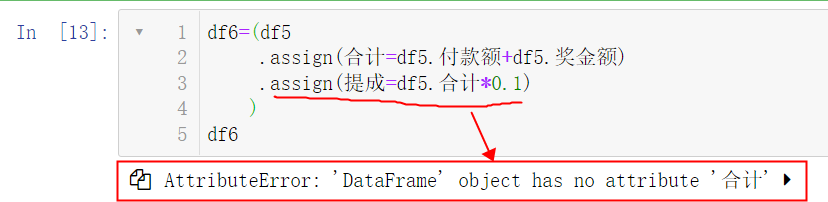


 这个错误的原因非常重要，因为本质上df5没有合计列，
 
 只能通过lambda进行调用，这部分内容看深入浅出的Pandas一书P108的说明

# 对列索引的筛选使用filter(items=[])

In [ ]:
# 使用filter对列进行筛选在链式反应中很常见
df5=(df_fk.filter(items=["合同编号","客商编码","付款额"])
     .query('付款额>(400000+@a01)')
     .assign(奖金额=df_fk.付款额*0.1)
     .assign(尾款=df_fk.付款额*0.8)
     .eval("奖金尾款合计=奖金额+尾款")
    )
df5

#  使用insert增加列

insert有三个参数，列数，列名，列的公式是个一个Series

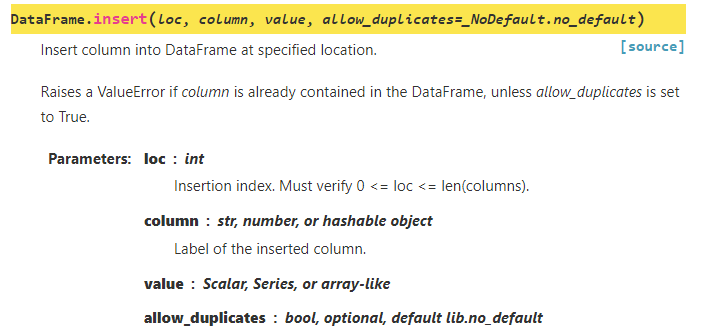

In [ ]:
a=df5.奖金额.sum(0)
df5.insert(4,"fuku02",a)
df5

# 对行中的数据进行筛选

## loc和filter进行筛选

这部分内容看filter的内容介绍

## 增加行

增加行的内容，目前只能在链式方法外进行操作。

目前链式方法只在列的增减方面能比较舒服，

在行的操作，以及变量定义等方面还是需要另外的操作方式。